# TensorFlow Decision Forests - TFDF and Exploratory Data Analysis - EDA on Spaceship Titanic Dataset

In this notebook, main aim is to create tree based model for predicting whether the passengers will get **transported** to the alternate dimension using new ML library open sourced by Google - *TensorFlow Decision Forests*. It was released just an year ago. 

As the name suggests, this library is built on traditional machine learning algorithm - **Decision Trees** as its building block. Popular decision tree models that has been widely used for winning Kaggle competitions are based on ensembling techniques - **Random Forests** which is bagging model and **Gradient Boosted Decision Trees** which is boosting model. Both of these models are available on in this library.

![GradientBoosting](https://miro.medium.com/max/1400/1*Rn-u1k5_8O4Vk7HQrPiX6w.png)

Advantages as follows:
- For tabular data, Decision Forests outforms Deep Learning methods.
- Preprocessing steps - one-hot encoding, normalization and handling of missing values is not required for basic ml models as it is natively supported by this library. This will save considerable amount of time.
- It is very easy to use just like scikit-learn model. Therefore, beginners will be able to start developing their models in no time and also be able to easily explain the decision forest models.
- It differs from sklearn library in is that these models are more optimized internally. Therefore, we wont have to do extensive hyperparameter tuning.
- For advanced users, the library provides easy interfacing for combining Neural Network models and Decision Trees.

## 0. Getting tools ready

In [1]:
!pip3 install -q tensorflow_decision_forests
!pip3 install -q klib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx-bsl 1.7.0 requires pyarrow<6,>=1, but you have pyarrow 7.0.0 which is incompatible.
tensorflow-transform 1.7.0 requires pyarrow<6,>=1, but you have pyarrow 7.0.0 which is incompatible.
tensorflow-transform 1.7.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<2.9,>=1.15.5, but you have tensorflow 2.9.0 which is incompatible.
tensorflow-io 0.21.0 requires tensorflow<2.7.0,>=2.6.0, but you have tensorflow 2.9.0 which is incompatible.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, but you have tensorflow-io-gcs-filesystem 0.26.0 which is incompatible.


In [2]:
# Data Handling and Manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import klib

# Machine Library
import tensorflow_decision_forests as tfdf #

# To split the data into train and validation sets
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2022-05-22 09:02:22.165304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-05-22 09:02:22.165366: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


## 1. Loading the Dataset

In [3]:
train_df = pd.read_csv('../input/spaceship-titanic/train.csv')
test_df = pd.read_csv('../input/spaceship-titanic/test.csv')
submission_id = test_df.PassengerId

In [4]:
train_df.sample(5, random_state=42)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
304,0337_02,Mars,False,F/63/S,TRAPPIST-1e,19.0,False,417.0,349.0,634.0,3.0,1057.0,Weros Perle,True
2697,2891_01,Earth,False,G/460/S,TRAPPIST-1e,18.0,False,4.0,904.0,0.0,0.0,1.0,Gleney Ortinericey,False
8424,8998_01,Earth,True,G/1449/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Gerry Englence,False
1672,1771_01,Earth,False,G/291/P,TRAPPIST-1e,35.0,False,0.0,338.0,436.0,NaN,0.0,Antone Cardner,True
8458,9034_02,Europa,True,D/288/P,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Errairk Crakete,True


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## 2. Exploratory Data Analysis

### 2.1 Categorical Data

GridSpec(6, 5)

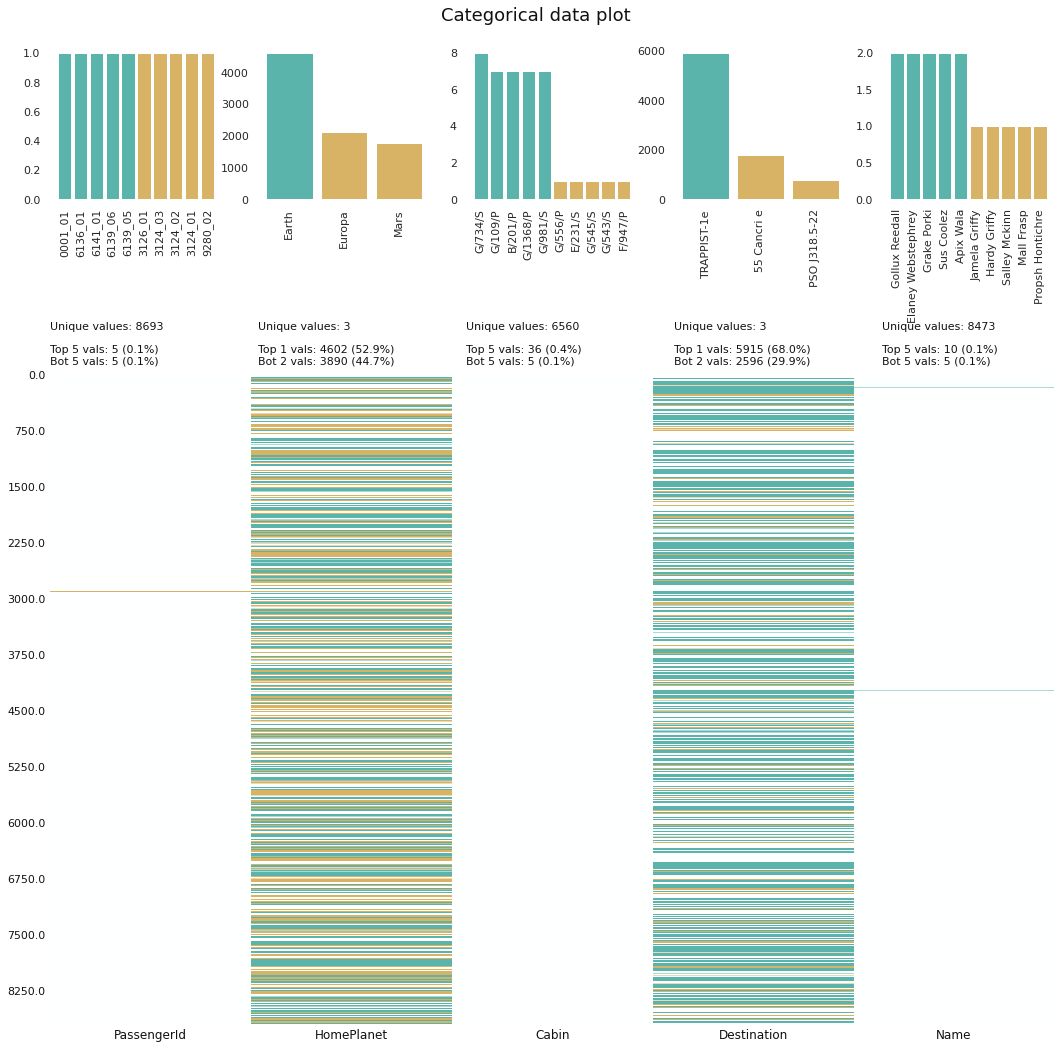

In [6]:
klib.cat_plot(train_df.drop(['CryoSleep', 'Transported', 'VIP'], axis=1), top=5, bottom=5)

### 2.2 Numerical Data

<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

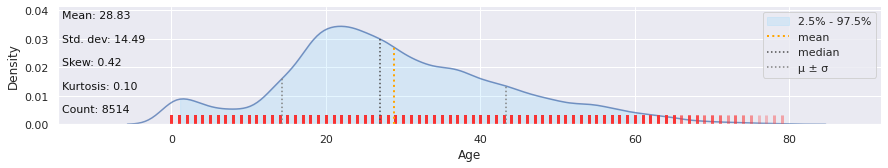

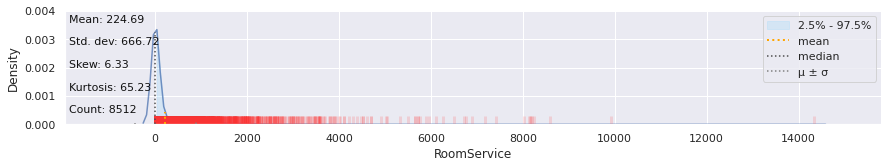

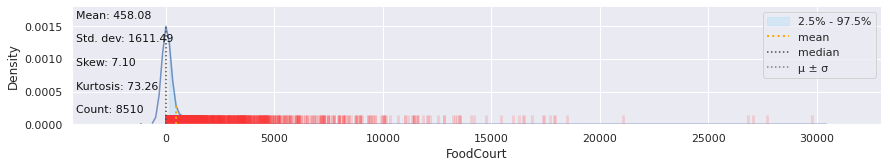

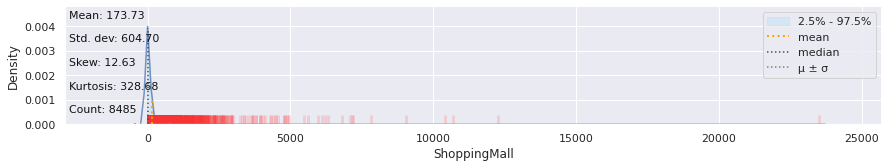

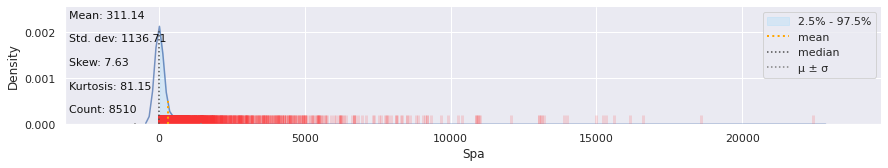

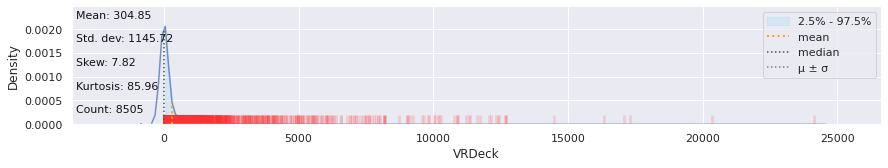

In [7]:
klib.dist_plot(train_df)

### 2.3 Visualization of Missing Values

GridSpec(6, 6)

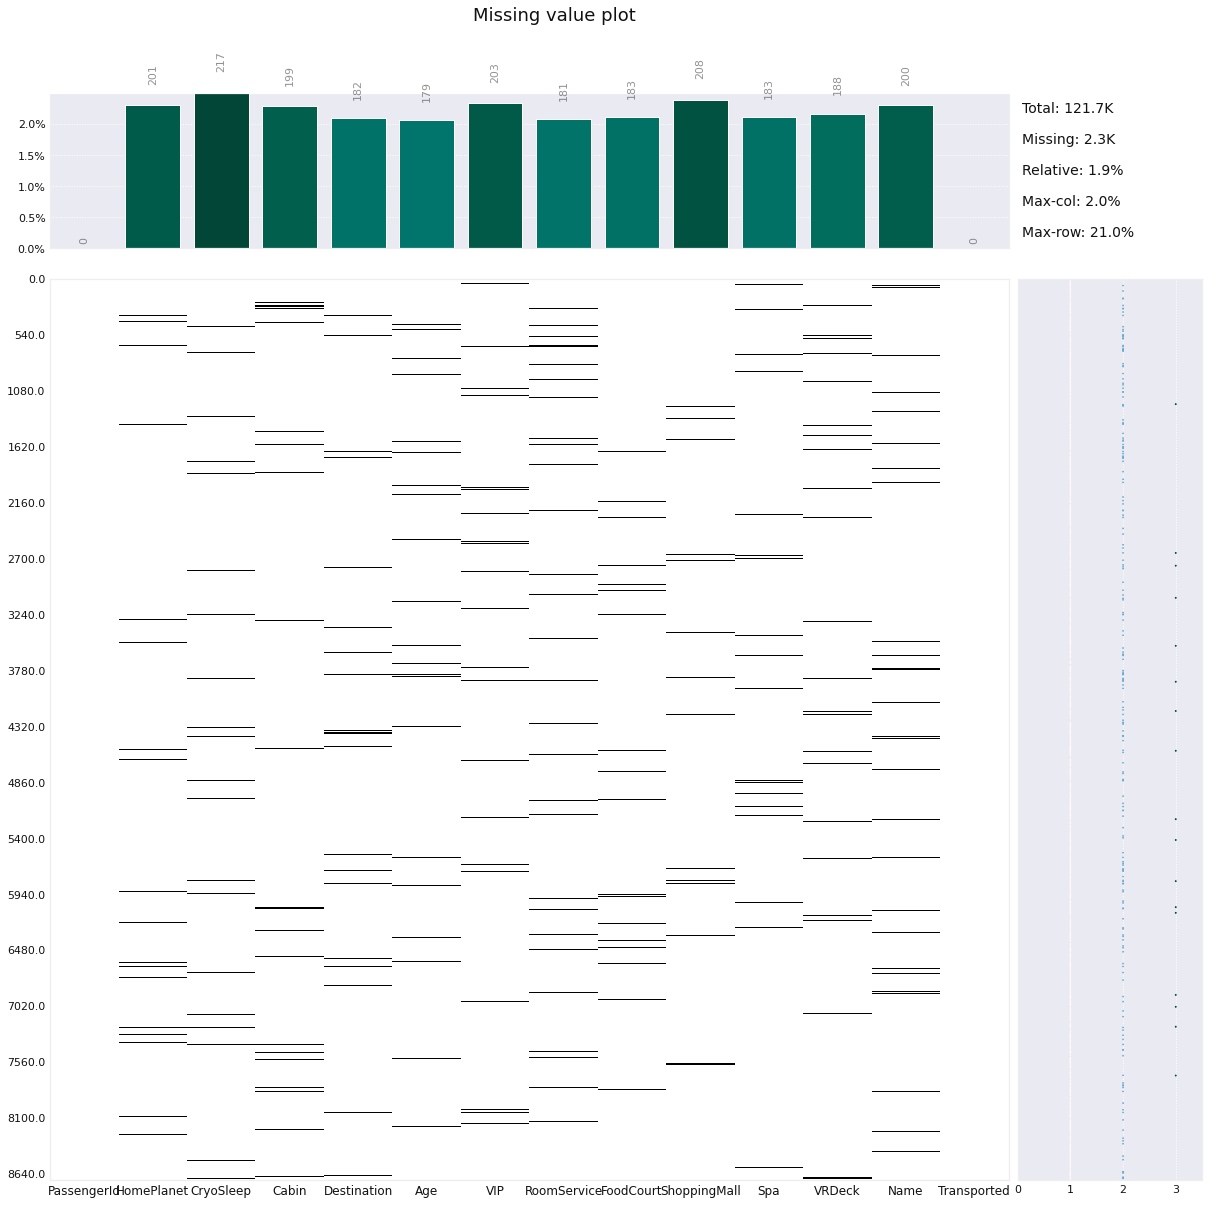

In [8]:
klib.missingval_plot(train_df)

### 2.4 Correlation Matrix Plot among the other features and target feature

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

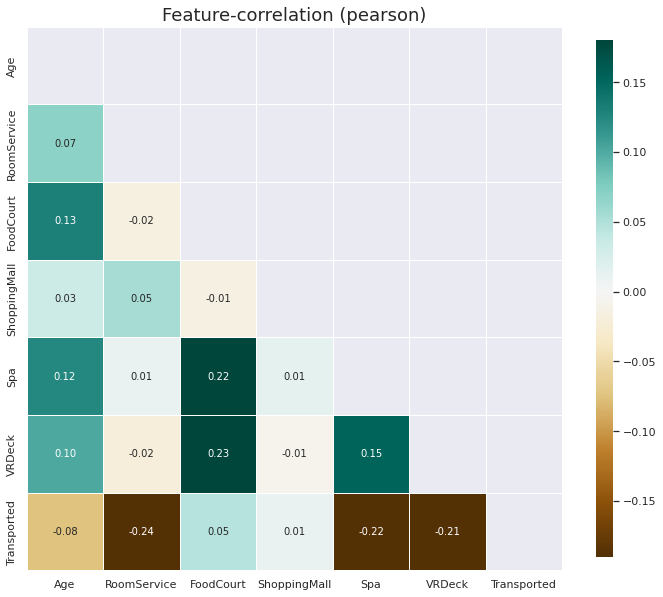

In [9]:
klib.corr_plot(train_df)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

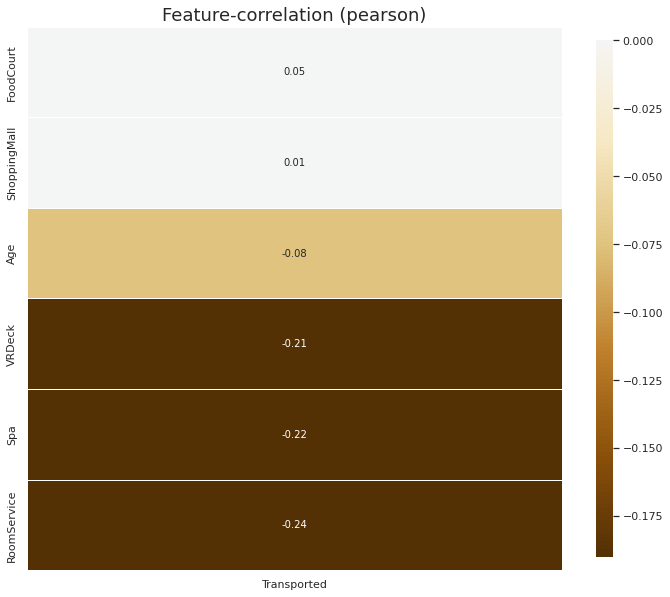

In [10]:
klib.corr_plot(train_df, target='Transported')

## 3. Perform Train and Validation Dataset Split

In [11]:
train_df_1, valid_df = train_test_split(train_df, test_size=.2, random_state=42, stratify=train_df['Transported'])

## 4. Feature Engineering

The existing features may have hidden information that cannot be interpreted by our models. Therefore, we can create more meaningful features that have significant or more impact on the target feature than their parent features.

<b>Note:</b> As categorical and missing values are handled well by `tensorflow decision trees`, we will not be handling missing values.

### 4.1 Creating New Features - `Group` and `Num_members` 

Based on the information given to us, first 4 characters from `PassengerId` feature represent a group and 2 characters after the underscore represents number of members.

In [12]:
train_df_1 =  pd.concat([train_df_1, train_df_1['PassengerId'].str.split('_', expand=True)], axis=1)
train_df_1.rename({0: 'Group', 1: 'Num_members'}, axis=1, inplace=True)
train_df_1['Num_members'] = train_df_1['Num_members'].astype(int)

In [13]:
train_df_1['Num_members'].unique()

array([4, 1, 3, 2, 6, 5, 7, 8])

In [14]:
valid_df =  pd.concat([valid_df, valid_df['PassengerId'].str.split('_', expand=True)], axis=1)
valid_df.rename({0: 'Group', 1: 'Num_members'}, axis=1, inplace=True)
valid_df['Num_members'] = valid_df['Num_members'].astype(int)

In [15]:
test_df =  pd.concat([test_df, test_df['PassengerId'].str.split('_', expand=True)], axis=1)
test_df.rename({0: 'Group', 1: 'Num_members'}, axis=1, inplace=True)
test_df['Num_members'] = test_df['Num_members'].astype(int)

In [16]:
train_df_1.sample(3, random_state=42)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Num_members
6052,6402_03,Earth,True,G/1032/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Paulah Knoxonway,True,6402,3
4409,4680_02,Mars,True,F/952/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Watros Colte,True,4680,2
8033,8598_02,Earth,True,G/1394/P,PSO J318.5-22,39.0,False,0.0,0.0,0.0,0.0,0.0,Eriana Mcbriggins,True,8598,2


In [17]:
valid_df.sample(3, random_state=42)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Num_members
3731,4001_05,Earth,False,F/758/S,NaN,34.0,False,0.0,847.0,14.0,0.0,0.0,Brancy Lowelliott,True,4001,5
4043,4319_01,Earth,False,G/711/P,TRAPPIST-1e,48.0,False,2.0,0.0,83.0,589.0,233.0,Kimmie Nobleyes,False,4319,1
226,0243_01,Earth,True,G/37/S,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Cartyernan,False,0243,1


In [18]:
test_df.sample(3, random_state=42)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Num_members
544,1135_02,Europa,False,NaN,55 Cancri e,61.0,False,26.0,3606.0,NaN,0.0,138.0,Toperon Coarswing,1135,2
410,0858_02,Mars,True,F/178/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,NaN,Hion Mad,0858,2
2554,5588_01,Mars,False,F/1066/S,TRAPPIST-1e,24.0,False,18.0,25.0,0.0,0.0,1256.0,Weres Cola,5588,1


Now, we will no more need `PassengerId` feature.

In [19]:
train_df_1.drop(['PassengerId'], axis=1, inplace=True)
valid_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.drop(['PassengerId'], axis=1, inplace=True)

### 4.2 Creating New Features - `Deck`, `Cabin_No` and `Side`

In [20]:
train_df_1 = pd.concat([train_df_1, train_df_1['Cabin'].str.split('/', expand=True)], axis=1)
valid_df = pd.concat([valid_df, valid_df['Cabin'].str.split('/', expand=True)], axis=1)
test_df = pd.concat([test_df, test_df['Cabin'].str.split('/', expand=True)], axis=1)

In [21]:
cabin_mapper = {0: 'Deck', 1: 'Cabin_num', 2: 'Side'}
train_df_1.rename(cabin_mapper, axis=1, inplace=True)
valid_df.rename(cabin_mapper, axis=1, inplace=True)
test_df.rename(cabin_mapper, axis=1, inplace=True)

In [22]:
train_df_1.sample(3, random_state=42)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Num_members,Deck,Cabin_num,Side
6052,Earth,True,G/1032/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Paulah Knoxonway,True,6402,3,G,1032,P
4409,Mars,True,F/952/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Watros Colte,True,4680,2,F,952,P
8033,Earth,True,G/1394/P,PSO J318.5-22,39.0,False,0.0,0.0,0.0,0.0,0.0,Eriana Mcbriggins,True,8598,2,G,1394,P


In [23]:
valid_df.sample(3, random_state=42)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Num_members,Deck,Cabin_num,Side
3731,Earth,False,F/758/S,NaN,34.0,False,0.0,847.0,14.0,0.0,0.0,Brancy Lowelliott,True,4001,5,F,758,S
4043,Earth,False,G/711/P,TRAPPIST-1e,48.0,False,2.0,0.0,83.0,589.0,233.0,Kimmie Nobleyes,False,4319,1,G,711,P
226,Earth,True,G/37/S,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Cartyernan,False,0243,1,G,37,S


In [24]:
test_df.sample(3, random_state=41)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Num_members,Deck,Cabin_num,Side
489,Earth,False,G/158/P,TRAPPIST-1e,27.0,NaN,54.0,47.0,630.0,0.0,53.0,Hilly Booneid,1055,1,G,158,P
3552,Earth,False,NaN,TRAPPIST-1e,43.0,False,8.0,0.0,0.0,780.0,0.0,Sandie Thorney,7732,1,NaN,NaN,NaN
91,Earth,False,F/43/P,PSO J318.5-22,29.0,False,1669.0,2.0,242.0,155.0,0.0,Gracy Goldendrice,0204,1,F,43,P


`Cabin` feature is no more required. Therefore, we will proceed to remove it.

In [25]:
train_df_1.drop('Cabin', axis=1, inplace=True)
valid_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

More feature engineering can be done. But we will leave the other learners to come up with it.

Boolean values are not supported by tensorflow library. Therefore, we need to convert them into numerical values: 0 - False & 1 - True.

In [26]:
transported = {True: 1, False: 0}
train_df_1['Transported'] = train_df_1['Transported'].map(transported)
valid_df['Transported'] = valid_df['Transported'].map(transported)

In [27]:
cryosleep = {True: 1, False: 0}
train_df_1['CryoSleep'] = train_df_1['CryoSleep'].map(cryosleep)
valid_df['CryoSleep'] = valid_df['CryoSleep'].map(cryosleep)
test_df['CryoSleep'] = test_df['CryoSleep'].map(cryosleep)

In [28]:
is_vip = {True: 1, False: 0}
train_df_1['VIP'] = train_df_1['VIP'].map(is_vip)
valid_df['VIP'] = valid_df['VIP'].map(is_vip)
test_df['VIP'] = test_df['VIP'].map(is_vip)

In [29]:
train_df_1.sample(3, random_state=42)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Num_members,Deck,Cabin_num,Side
6052,Earth,1.0,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paulah Knoxonway,1,6402,3,G,1032,P
4409,Mars,1.0,TRAPPIST-1e,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Watros Colte,1,4680,2,F,952,P
8033,Earth,1.0,PSO J318.5-22,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Eriana Mcbriggins,1,8598,2,G,1394,P


In [30]:
valid_df.sample(3, random_state=42)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Num_members,Deck,Cabin_num,Side
3731,Earth,0.0,NaN,34.0,0.0,0.0,847.0,14.0,0.0,0.0,Brancy Lowelliott,1,4001,5,F,758,S
4043,Earth,0.0,TRAPPIST-1e,48.0,0.0,2.0,0.0,83.0,589.0,233.0,Kimmie Nobleyes,0,4319,1,G,711,P
226,Earth,1.0,TRAPPIST-1e,21.0,0.0,0.0,0.0,0.0,0.0,0.0,Lilace Cartyernan,0,0243,1,G,37,S


In [31]:
test_df.sample(3, random_state=41)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Num_members,Deck,Cabin_num,Side
489,Earth,0.0,TRAPPIST-1e,27.0,NaN,54.0,47.0,630.0,0.0,53.0,Hilly Booneid,1055,1,G,158,P
3552,Earth,0.0,TRAPPIST-1e,43.0,0.0,8.0,0.0,0.0,780.0,0.0,Sandie Thorney,7732,1,NaN,NaN,NaN
91,Earth,0.0,PSO J318.5-22,29.0,0.0,1669.0,2.0,242.0,155.0,0.0,Gracy Goldendrice,0204,1,F,43,P


Now, the dataset is ready to be converted into tensorflow datasets.

In [32]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df_1, label="Transported")
validation_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df, label="Transported")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

/opt/conda/lib/python3.7/site-packages/tensorflow_decision_forests/keras/core.py:2533: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)
2022-05-22 09:02:38.823001: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-05-22 09:02:38.823056: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-22 09:02:38.823090: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0394041dfb6b): /proc/driver/nvidia/version does not exist
2022-05-22 09:02:38.823476: I tensorflow/core/p

## 5. Training Model using TensorFlow Decision Forests

### 5.1 Using RandomForestModel 

In [33]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel()

# Train the model.
model_1.fit(x=train_ds)

# Evaluate the model
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(validation_ds, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

Use /tmp/tmpyrp8mova as temporary training directory
Reading training dataset...
Training dataset read in 0:00:04.458964. Found 6954 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpyrp8mova/model/ with prefix 327df21108e0411e


Model trained in 0:00:45.085876
Compiling model...


[INFO abstract_model.cc:1158] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.
2/2 [==============================] - 1s 56ms/step - loss: 0.0000e+00 - accuracy: 0.8005

loss: 0.0000
accuracy: 0.8005


For a base model, 80% is a good score. Lets perform Hyperparameter Tuning and evaluate the accuracy.

In [34]:
model_2 = tfdf.keras.RandomForestModel(
    num_trees=300,
    growing_strategy="BEST_FIRST_GLOBAL",
    max_depth=11,
    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
)

# Train the model.
model_2.fit(x=train_ds)

# Evaluate the model
model_2.compile(metrics=["accuracy"])
evaluation = model_2.evaluate(validation_ds, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

Use /tmp/tmpuu1z0pk9 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.322449. Found 6954 examples.
Training model...
Model trained in 0:00:48.386144
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpuu1z0pk9/model/ with prefix f2d407938e4641e3
[INFO abstract_model.cc:1158] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.
2/2 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accuracy: 0.8010

loss: 0.0000
accuracy: 0.8010


It gets cumbersome to manually enter values and change the default parameters to get best accuracy score though. Google developers we already came up with good combinations of the hyperparameters that gives better results than default parameters which has been indexed and are available as hyperparameter templates.

In [35]:
# The hyper-parameter templates of the Random Forest Tree model.
print(tfdf.keras.RandomForestModel.predefined_hyperparameters())

[HyperParameterTemplate(name='better_default', version=1, parameters={'winner_take_all': True}, description='A configuration that is generally better than the default parameters without being more expensive.'), HyperParameterTemplate(name='benchmark_rank1', version=1, parameters={'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')]


In [36]:
# Specify the model.
model_3 = tfdf.keras.RandomForestModel(hyperparameter_template="better_default")

# Train the model.
model_3.fit(x=train_ds)

# Evaluate the model
model_3.compile(metrics=["accuracy"])
evaluation = model_3.evaluate(validation_ds, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

Resolve hyper-parameter template "better_default" to "better_default@v1" -> {'winner_take_all': True}.
Use /tmp/tmp3aaxxwm6 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.447630. Found 6954 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmp3aaxxwm6/model/ with prefix 201d5b76981841f0


Model trained in 0:00:46.502137
Compiling model...


[INFO abstract_model.cc:1158] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.
2/2 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - accuracy: 0.8005

loss: 0.0000
accuracy: 0.8005


In [37]:
# Specify the model.
model_4 = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")

# Train the model.
model_4.fit(x=train_ds)

# Evaluate the model
model_4.compile(metrics=["accuracy"])
evaluation = model_4.evaluate(validation_ds, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp_r_bfk5x as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.316884. Found 6954 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmp_r_bfk5x/model/ with prefix a6420b4494394397


Model trained in 0:00:45.719386
Compiling model...


[INFO abstract_model.cc:1158] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.
2/2 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - accuracy: 0.8016

loss: 0.0000
accuracy: 0.8016


### 5.2 Using GradientBoostedTreesModel

In [38]:
# Specify the model.
model_5 = tfdf.keras.GradientBoostedTreesModel()

# Train the model.
model_5.fit(x=train_ds)

# Evaluate the model
model_5.compile(metrics=["accuracy"])
evaluation = model_5.evaluate(validation_ds, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

Use /tmp/tmpu43v9zq6 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.326610. Found 6954 examples.
Training model...
Model trained in 0:00:34.979475
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpu43v9zq6/model/ with prefix 0cd899c34a834719
[INFO abstract_model.cc:1158] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.
2/2 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.8051

loss: 0.0000
accuracy: 0.8051


Lets perform Hyperparameter Tuning and evaluate the accuracy.

In [39]:
# The hyper-parameter templates of the Random Forest Tree model.
print(tfdf.keras.GradientBoostedTreesModel.predefined_hyperparameters())

[HyperParameterTemplate(name='better_default', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL'}, description='A configuration that is generally better than the default parameters without being more expensive.'), HyperParameterTemplate(name='benchmark_rank1', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')]


In [40]:
# Specify the model.
model_6 = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="better_default")

# Train the model.
model_6.fit(x=train_ds)

# Evaluate the model
model_6.compile(metrics=["accuracy"])
evaluation = model_6.evaluate(validation_ds, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

Resolve hyper-parameter template "better_default" to "better_default@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL'}.
Use /tmp/tmpxv1bmtn7 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.314141. Found 6954 examples.
Training model...
Model trained in 0:00:49.503471
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpxv1bmtn7/model/ with prefix de7d2c98245e4a4e
[INFO abstract_model.cc:1158] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.
2/2 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.7987

loss: 0.0000
accuracy: 0.7987


In [41]:
# Specify the model.
model_7 = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1")

# Train the model.
model_7.fit(x=train_ds)

# Evaluate the model
model_7.compile(metrics=["accuracy"])
evaluation = model_7.evaluate(validation_ds, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpj97i_s7g as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.332283. Found 6954 examples.
Training model...
Model trained in 0:00:42.049529
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpj97i_s7g/model/ with prefix 60919bef5953462f
[INFO abstract_model.cc:1158] Engine "GradientBoostedTreesGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.
2/2 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.7993

loss: 0.0000
accuracy: 0.7993


## 6. Conclusions and Recommendation

Just by adjusting few parameter(s), we could see there was an improvement in accuracy for Random Forest Model but for Gradient Boosting Trees Model it is other way round. Model can be further improved by further performing feature engineering and do more rounds of hyperparameter tuning.As this competition just evaluates on accuracy, we are not evaluating this model based on other metrics such as: 
- Receiver Operating Characteristics(ROC) Curve
- Precision, Recall and F1 or F-Beta score
- Confusion Matrix

Accuracy itself doesn't represent goodness of a model. Therefore, we need to perform above the metrics evaluation as well. This I am leaving upto the readers who will go through this notebook.

## 7. Resources

- Official Tensorflow Tutorial: https://www.tensorflow.org/decision_forests/tutorials/beginner_colab
- Klib for EDA: https://klib.readthedocs.io/en/latest/

## 8. Submission

In [42]:
def proba_output(num):
    if num >= .4999:
        return True
    else:
        return False

As model 5 yielded highest accuracy out of all the models in the validation process, we will be using it for submission.

In [43]:
y_preds = model_5.predict(test_ds).reshape(test_df.shape[0],)
output = list(map(proba_output, y_preds))
submission_df = pd.DataFrame({'PassengerId': submission_id, 'Transported': output})
submission_df.to_csv('submission.csv', index=False)

5/5 [==============================] - 0s 8ms/step
